In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# --- 1. Memuat dan Mempersiapkan Data ---
# Muat dataset Iris
file_path = 'D:/Arif Kurniawan/Sekolah/S3/perkuliahan/2025/Pembelajaran Mesin Mendalam Lanjut/TUGAS 1/PMM-TemplateSLP_1.xlsx'

# Pisahkan fitur (X) dan target (y) dari DataFrame
# Kita tetap menggunakan kolom 'petal_length' dan 'petal_width' sebagai fitur
X_df = iris_df[['X0','X1','X2', 'X3']]

# Kita akan membuat target menjadi biner: 
# Kelas 0 (Setosa) vs Kelas 1 (Versicolor)
# (iris.target == 0) akan menghasilkan True untuk Setosa dan False untuk lainnya.
# .astype(int) mengubah True/False menjadi 1/0.
y_series = (iris_df['X4'] == 'Iris-versicolor').astype(int)

# Konversi dari format pandas (DataFrame/Series) ke format scikit-learn (NumPy array)
x = X_df.values
y = y_series.values

# --- 2. Membagi Data Menjadi Data Latih dan Data Uji ---

# Bagi data dengan perbandingan 80% latih dan 20% uji
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# 3. Definisikan Fungsi Aktivasi Sigmoid
def sigmoid(z):
    """Fungsi untuk menghitung aktivasi sigmoid"""
    return 1.0 / (1.0 + np.exp(-z))

# 4. Inisialisasi Parameter
learning_rate = 0.1
n_epochs = 5 # Epoch Jumlahnya = 5 kali
n_features = X_train_scaled.shape[1]

# History untuk data training
current_sse_history = []
current_accuracy_history = []

train_sse_history = []
train_accuracy_history = []
# History untuk data validasi
val_sse_history = []
val_accuracy_history = []

# 5. Inisialisasi bobot (weights) dan bias = 0.5
# Menggunakan random_state untuk hasil yang konsisten

weights = np.full(shape=n_features, fill_value=0.5)
bias = 0.5

print(f"Inisialisasi Bobot Awal: {weights}")
print(f"Inisialisasi Bias Awal: {bias}\n")
print("="*80)
print("MEMULAI PROSES PELATIHAN MODEL SLP")
print("="*80)

# 5. Proses Pelatihan (Training Loop)
for epoch in range(n_epochs):
    print(f"\n---------- EPOCH {epoch + 1} ----------")

    # Inisialisasi metrik kumulatif di awal setiap epoch
    cumulative_sse = 0.0
    cumulative_correct_predictions = 0
        
    # Loop untuk setiap sampel data dalam data latih
    # --- Training pada data latih ---
    for i, x_i in enumerate(X_train_scaled):
        
        
        # Langkah 1: Hitung Net Input (dot product z)
        # z = (w1*x1 + w2*x2 + ...) + b
        z = np.dot(x_i, weights) + bias
        
        # Langkah 2: Hitung Output Aktivasi (Sigmoid)
        activation = sigmoid(z)
        
        # Langkah 3: Buat Prediksi
        # Jika output sigmoid > 0.5, prediksi kelas 1, selain itu kelas 0
        prediction = 1 if activation >= 0.5 else 0
        
        # Langkah 4: Hitung Error
        # Error = Label Asli - Prediksi
        error = y_train[i] - prediction
        
        # Langkah 5: Update Bobot dan Bias
        # w_new = w_old - (learning_rate * (2*(sigmoid-target)*(1-sigmoid)*sigmoid) * x_i
        # b_new = b_old - (learning_rate * (2*(sigmoid-target)*(1-sigmoid)*sigmoid)
        weights -= learning_rate * (2*(sigmoid(z)-y_train[i])*(1-sigmoid(z))*sigmoid(z)) * x_i
        bias -= learning_rate * (2*(sigmoid(z)-y_train[i])*(1-sigmoid(z))*sigmoid(z))
        
        # Langkah 6 : Hitung Sum Square Error
        cumulative_sse += error**2

        # Langkah 7 : Hitung Akurasi
        if prediction == y_train[i]:
            cumulative_correct_predictions += 1
            
        # Hitung akurasi berjalan (running accuracy)
        current_accuracy = cumulative_correct_predictions / (i + 1)
        
        # Tampilkan semua detail proses untuk sampel ini              
        
        print(f"  Sampel -{i+1}:")
        print(f"    - Bobot       : {weights}")
        print(f"    - Bias        : {bias:.4f}")
        print(f"    - Dot (z)     : {z:.4f}")
        print(f"    - Sigmoid     : {activation:.4f}")
        print(f"    - Prediksi    : {prediction} (Label Asli: {y_train[i]})")
        print(f"    - Error       : {error}")
        print(f"    - Sum Square Error : {cumulative_sse}")
        print(f"    - Akurasi     : {current_accuracy:.2%}")
        print("-" * 40)
        
    
    current_sse_history.append(cumulative_sse)
    current_accuracy_history.append(current_accuracy)
    print(f"Epoch {epoch+1:02d} | Train Acc: {current_accuracy:.2%} | Train SSE: {cumulative_sse:.2f} |")
           
    # --- Blok Evaluasi pada Data Validasi ---
    val_epoch_sse = 0.0
    val_correct_predictions = 0
    for i, x_i in enumerate(X_test_scaled): # Gunakan data validasi        
        z_val = np.dot(x_i, weights) + bias
        prediction_val = 1 if sigmoid(z_val) >= 0.5 else 0
        error_val = y_test[i] - prediction_val # Gunakan label validasi
        val_epoch_sse += error_val**2
        if prediction_val == y_test[i]:
            val_correct_predictions += 1
        val_epoch_accuracy1 = val_correct_predictions / len(y_test)

        '''
        print(f"  Validasi Sampel -{i+1}:")
        print(f"    - Dot (z) val  : {z_val:.4f}")
        print(f"    - Prediksi_val : {prediction_val} (Label Asli: {y_test[i]})")
        print(f"    - Error_val    : {error_val}")
        print(f"    - val_Sum Square Error : {val_epoch_sse}")
        print(f"    - Akurasi     : {val_epoch_accuracy1:.2%}")
        print("-" * 40)
        '''
    #val_epoch_accuracy = val_correct_predictions / len(y_test)
    val_sse_history.append(val_epoch_sse)
    val_accuracy_history.append(val_epoch_accuracy1)
    print(f"Epoch {epoch+1:02d} | Val Acc: {val_epoch_accuracy1:.2%} | Val SSE: {val_epoch_sse:.2f} |")
    
print("\nPELATIHAN SELESAI!")
print("="*80)


Inisialisasi Bobot Awal: [0.5 0.5 0.5 0.5]
Inisialisasi Bias Awal: 0.5

MEMULAI PROSES PELATIHAN MODEL SLP

---------- EPOCH 1 ----------
  Sampel -1:
    - Bobot       : [0.48940475 0.42582586 0.52584213 0.51873504]
    - Bias        : 0.4731
    - Dot (z)     : 1.2457
    - Sigmoid     : 0.7766
    - Prediksi    : 1 (Label Asli: 0)
    - Error       : -1
    - Sum Square Error : 1.0
    - Akurasi     : 0.00%
----------------------------------------
  Sampel -2:
    - Bobot       : [0.49030831 0.42584494 0.52639362 0.51923137]
    - Bias        : 0.4734
    - Dot (z)     : 3.0556
    - Sigmoid     : 0.9550
    - Prediksi    : 1 (Label Asli: 1)
    - Error       : 0
    - Sum Square Error : 1.0
    - Akurasi     : 50.00%
----------------------------------------
  Sampel -3:
    - Bobot       : [0.4689303  0.3613484  0.53921376 0.53031978]
    - Bias        : 0.5023
    - Dot (z)     : -0.4093
    - Sigmoid     : 0.3991
    - Prediksi    : 0 (Label Asli: 1)
    - Error       : 1
    - S

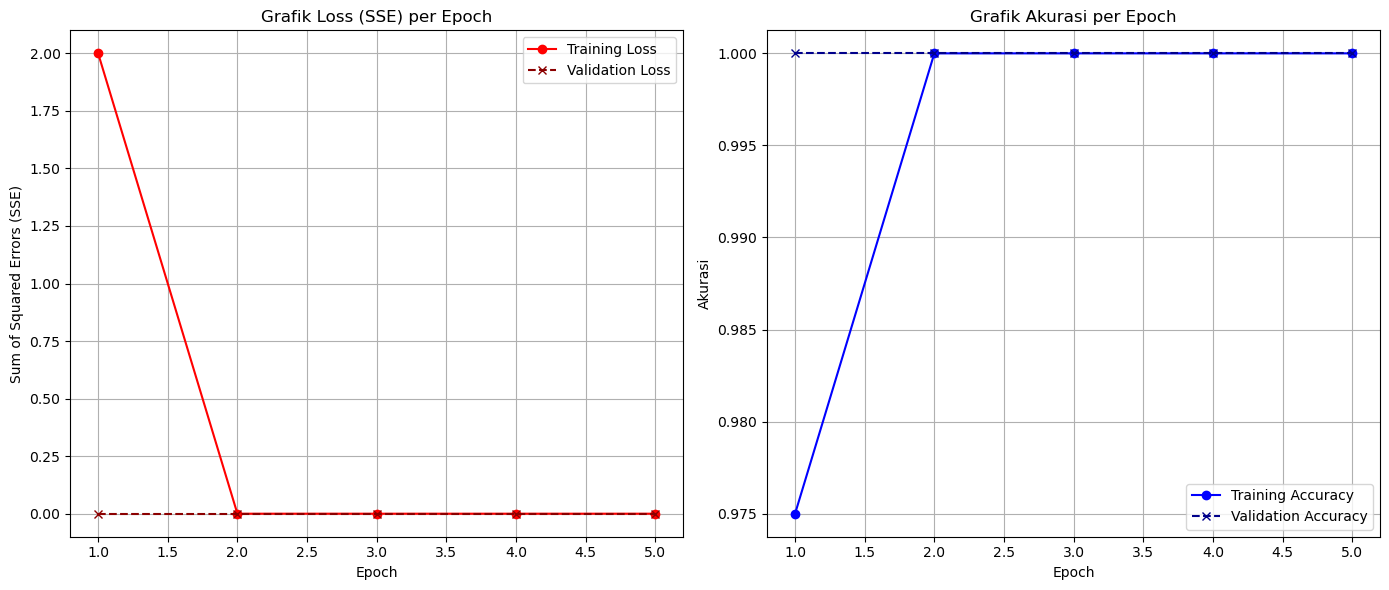

In [67]:
# Tahap Membuat Grafik Performa ---
epochs_range = range(1, n_epochs + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Grafik Loss (SSE)
ax[0].plot(epochs_range, current_sse_history, marker='o', color='r', label='Training Loss')
ax[0].plot(epochs_range, val_sse_history, marker='x', linestyle='--', color='darkred', label='Validation Loss')
ax[0].set_title('Grafik Loss (SSE) per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum of Squared Errors (SSE)')
ax[0].legend()
ax[0].grid(True)

# Plot 2: Grafik Akurasi
ax[1].plot(epochs_range, current_accuracy_history, marker='o', color='b', label='Training Accuracy')
ax[1].plot(epochs_range, val_accuracy_history, marker='x', linestyle='--', color='darkblue', label='Validation Accuracy')
ax[1].set_title('Grafik Akurasi per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Akurasi')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()